<a href="https://colab.research.google.com/github/tobby-lie/Recurrent-Neural-Network-from-Scratch/blob/master/Lie_5931_PA3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [3]:
import csv
import itertools
import operator
import numpy as np
import sys
from datetime import datetime
import matplotlib.pyplot as plt

%cd /content/drive/My\ Drive/5931_PA3
%ls

!pip3 install nltk

/content/drive/My Drive/5931_PA3
Lie_5931_PA3.ipynb  SciFi_Three.txt


In [8]:
import nltk
import ssl

try:
    _create_unverified_https_context = ssl._create_unverified_context
except AttributeError:
    pass
else:
    ssl._create_default_https_context = _create_unverified_https_context

nltk.download()

NLTK Downloader
---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> d

Download which package (l=list; x=cancel)?
  Identifier> punkt
      Unzipping tokenizers/punkt.zip.

---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> q


True

In [0]:
import matplotlib.pyplot as plt

def generate_loss_epoch_plt(losses):
  ''' generates loss vs epoch plot based off of list of losses generted from training'''
  x_plt = []  # holds x values
  y_plt = []  # holds y values

  epoch_ct = 0  # need epoch_ct to keep track of which epoch the loss belongs to
  # for each loss add the epoch and appropriate loss from tuple to x and y
  for loss in losses:
    x_plt.append(epoch_ct)
    y_plt.append(loss[1])
    epoch_ct += 1

  plt.plot(x_plt, y_plt)  # plot from x and y lists
  plt.title('Loss vs. Epoch') # title 
  plt.ylabel('Loss') # y axis title
  plt.xlabel('Epoch') # x axis title
  plt.show() 

In [0]:
vocabulary_size = 8000
unknown_token = "UNKNOWN"
sentence_start_token = "SENTENCE_START"
sentence_end_token = "SENTENCE_END"
num_ascii_char = 256

### From file specified, from each paragraph, tokenize into sentences and add sentence_start_token and sentence_end_token into sentences. Get rid of the newline character and replace with a space and append to the sentence_list. Finally, report how many sentences there are.

In [11]:
print("Reading .txt file...")

sentences = []
sentence_list = []
filename = "SciFi_Three.txt"
with open(filename, "r") as f:
    
    # Split all paragraphs by two newline characters
    all_content = f.read()
    paragraphs = all_content.split("\n\n")
    
    # For each paragraph, tokenize sentences and then place in sentence_list
    for paragraph in paragraphs:

        sentences = nltk.sent_tokenize(paragraph.lower())
        
        sentences = ["%s %s %s" % (sentence_start_token, x, sentence_end_token) for x in sentences]

        for sentence in sentences:
            sentence = sentence.replace("\n", " ")
            sentence_list.append(sentence)
            
print("Parsed %d sentences." % (len(sentence_list)))  # report how many sentences
            

Reading .txt file...
Parsed 25324 sentences.


In [122]:
# Display how the sentences 0-99 in sentence_list
sentence_list[0:100]

['SENTENCE_START the mysterious island SENTENCE_END',
 'SENTENCE_START by jules verne SENTENCE_END',
 'SENTENCE_START 1874 SENTENCE_END',
 'SENTENCE_START  part 1--dropped from the clouds SENTENCE_END',
 'SENTENCE_START chapter 1 SENTENCE_END',
 'SENTENCE_START “are we rising again?” “no. SENTENCE_END',
 'SENTENCE_START on the contrary.” “are we descending?”  “worse than that, captain! SENTENCE_END',
 'SENTENCE_START we are falling!” “for heaven’s sake heave out the ballast!” “there! SENTENCE_END',
 'SENTENCE_START the last sack is empty!” “does the balloon rise?”  “no!” “i hear a noise like the dashing of waves. SENTENCE_END',
 'SENTENCE_START the sea is below the car! SENTENCE_END',
 'SENTENCE_START it cannot be more than 500 feet from us!” “overboard with every weight! SENTENCE_END',
 'SENTENCE_START ... everything!” SENTENCE_END',
 'SENTENCE_START such were the loud and startling words which resounded through the air, above the vast watery desert of the pacific, about four o’clock 

### The below code is used for part a). It concatenates every two consecutive sentences together to approximately double the sentence length that is being fed into our network for training.

In [0]:
count = 0
sent = ""
token_sent_double = []
for sentence in sentence_list:
  sent += sentence # set sent to two consecutive sentences
  sent = sent.replace(' SENTENCE_ENDSENTENCE_START ', ' ') # need to get rid of start and end in middle after concatenating

  count += 1
  if count % 2 == 0:
    token_sent_double.append(sent) # append to list
    sent = ""
    count = 0

### The below code is used for part b). It halves every sentence to halve the sentence length that is being fed into our network for training.

In [0]:
token_sent_half = []
for sentence in sentence_list:
  sentence = nltk.word_tokenize(sentence) # tokenize into list of separate words
  first_half, second_half = (sentence[:round(len(sentence)/2)]), (sentence[round(len(sentence)/2):]) # split string into first and second halves
  first_half.append('SENTENCE_END') # add sentence end to first half at end
  second_half.insert(0, 'SENTENCE_START') # add sentence start to second half at beginning
  token_sent_half.append(" ".join(first_half)) # must join before appending to rejoin into sentence string
  token_sent_half.append(" ".join(second_half))

### Get tokenized sentence lists for each separate part

In [0]:
# for first part
tokenized_sentences = [nltk.word_tokenize(sent) for sent in sentence_list]

# for second part with double length sentences
tokenized_sentences_double = [nltk.word_tokenize(sent) for sent in token_sent_double]

# for third part with half length sentences
tokenized_sentences_half = [nltk.word_tokenize(sent) for sent in token_sent_half]

In [135]:
print((str(len(tokenized_sentences))) + " tokenized sentences for first part.")

# Note how number of sentences in double the length is half the number compared to original
print((str(len(tokenized_sentences_double))) + " tokenized sentences for second part.")

# Note how number of sentences in half the length is double the number compared to original
print((str(len(tokenized_sentences_half))) + " tokenized sentences for third part.")

25324 tokenized sentences for first part.
12662 tokenized sentences for second part.
50648 tokenized sentences for third part.


In [136]:
print(tokenized_sentences[6])

print(tokenized_sentences_double[6])

print(tokenized_sentences_half[6])

['SENTENCE_START', 'on', 'the', 'contrary.', '”', '“', 'are', 'we', 'descending', '?', '”', '“', 'worse', 'than', 'that', ',', 'captain', '!', 'SENTENCE_END']
['SENTENCE_START', 'such', 'were', 'the', 'loud', 'and', 'startling', 'words', 'which', 'resounded', 'through', 'the', 'air', ',', 'above', 'the', 'vast', 'watery', 'desert', 'of', 'the', 'pacific', ',', 'about', 'four', 'o', '’', 'clock', 'in', 'the', 'evening', 'of', 'the', '23rd', 'of', 'march', ',', '1865.', 'few', 'can', 'possibly', 'have', 'forgotten', 'the', 'terrible', 'storm', 'from', 'the', 'northeast', ',', 'in', 'the', 'middle', 'of', 'the', 'equinox', 'of', 'that', 'year', '.', 'SENTENCE_END']
['SENTENCE_START', 'part', '1', '--', 'SENTENCE_END']


In [0]:
word_freq = nltk.FreqDist(itertools.chain(*tokenized_sentences))

word_freq_double = nltk.FreqDist(itertools.chain(*tokenized_sentences_double))

word_freq_half = nltk.FreqDist(itertools.chain(*tokenized_sentences_half))

In [141]:
print("Found %d unique words tokens in tokenized_sentences." % len(word_freq.items()))

print("Found %d unique words tokens in tokenized_sentences_double." % len(word_freq_double.items()))

print("Found %d unique words tokens in tokenized_sentences_half." % len(word_freq_half.items()))

Found 20063 unique words tokens in tokenized_sentences.
Found 20064 unique words tokens in tokenized_sentences_double.
Found 19206 unique words tokens in tokenized_sentences_half.


In [0]:
word_freq

In [0]:
word_freq_double

In [0]:
word_freq_half

In [0]:
vocab_1 = word_freq.most_common(vocabulary_size-1) # for original 
vocab_2 = word_freq_double.most_common(vocabulary_size-1) # for double
vocab_3 = word_freq_half.most_common(vocabulary_size-1) # for half

# index to word and word to index for original
index_to_word_1 = [x[0] for x in vocab_1]
index_to_word_1.append(unknown_token)
word_to_index_1 = dict([(w,i) for i,w in enumerate(index_to_word_1)])

# index to word and word to index for double
index_to_word_2 = [x[0] for x in vocab_2]
index_to_word_2.append(unknown_token)
word_to_index_2 = dict([(w,i) for i,w in enumerate(index_to_word_2)])

# index to word and word to index for half
index_to_word_3 = [x[0] for x in vocab_3]
index_to_word_3.append(unknown_token)
word_to_index_3 = dict([(w,i) for i,w in enumerate(index_to_word_3)])

In [0]:
word_to_index_1

In [0]:
word_to_index_2

In [0]:
word_to_index_3

In [153]:
print("Using vocabulary size %d." % vocabulary_size)
print("The least frequent word in our original vocabulary is '%s' and appeared %d times." % (vocab_1[-1][0], vocab_1[-1][1]))
print("The least frequent word in our double vocabulary is '%s' and appeared %d times." % (vocab_2[-1][0], vocab_2[-1][1]))
print("The least frequent word in our half vocabulary is '%s' and appeared %d times." % (vocab_3[-1][0], vocab_3[-1][1]))
#word_freq.most_common(10)

Using vocabulary size 8000.
The least frequent word in our original vocabulary is 'sober' and appeared 3 times.
The least frequent word in our double vocabulary is 'sober' and appeared 3 times.
The least frequent word in our half vocabulary is 'boatmen' and appeared 3 times.


In [156]:
print(index_to_word_1[7999])
print(index_to_word_2[7999])
print(index_to_word_3[7999])

UNKNOWN
UNKNOWN
UNKNOWN


In [0]:
# Replace all words not in vocabulary with the unknown token ORIGINAL
for i, sentence in enumerate(tokenized_sentences):
    tokenized_sentences[i] = [w if w in word_to_index else unknown_token for w in sentence]

In [0]:
# Replace all words not in vocabulary with the unknown token DOUBLE
for i, sentence in enumerate(tokenized_sentences_double):
    tokenized_sentences_double[i] = [w if w in word_to_index else unknown_token for w in sentence]

In [0]:
# Replace all words not in vocabulary with the unknown token HALF
for i, sentence in enumerate(tokenized_sentences_half):
    tokenized_sentences_half[i] = [w if w in word_to_index else unknown_token for w in sentence]

In [161]:
print("\nExample sentence: '%s'" % sentence_list[3])
print("\nExample sentence after Pre-processing: '%s'" % tokenized_sentences[3])


Example sentence: 'SENTENCE_START  part 1--dropped from the clouds SENTENCE_END'

Example sentence after Pre-processing: '['SENTENCE_START', 'part', '1', '--', 'dropped', 'from', 'the', 'clouds', 'SENTENCE_END']'


### Create training data for each part of Task 1

In [0]:
# Create the training data for original
XTrain = np.asarray([[word_to_index[w] for w in sent[:-1]] for sent in tokenized_sentences])
YTrain = np.asarray([[word_to_index[w] for w in sent [1:]] for sent in tokenized_sentences])

# Create the training data for double
XTrain_double = np.asarray([[word_to_index[w] for w in sent[:-1]] for sent in tokenized_sentences_double])
YTrain_double = np.asarray([[word_to_index[w] for w in sent [1:]] for sent in tokenized_sentences_double])

# Create the training data for half
XTrain_half = np.asarray([[word_to_index[w] for w in sent[:-1]] for sent in tokenized_sentences_half])
YTrain_half = np.asarray([[word_to_index[w] for w in sent [1:]] for sent in tokenized_sentences_half])

In [163]:
XTrain

array([list([2, 1, 843, 77]), list([2, 26, 4825, 1537]), list([2, 7999]),
       ...,
       list([2, 299, 16, 68, 13, 1161, 343, 541, 5, 18, 7999, 590, 38]),
       list([2, 347, 6, 15, 313, 146, 7006, 419, 1495, 9, 1, 1262, 5, 7999, 10, 85, 104, 5657, 1, 7999, 425, 38, 11, 7999, 269, 87, 5, 46, 1703, 40, 84, 4347, 1, 179, 6, 392, 4]),
       list([2, 63, 106, 7, 5246])], dtype=object)

In [164]:
XTrain_double

array([list([2, 1, 843, 77, 26, 4825, 1537]),
       list([2, 7999, 177, 1303, 69, 1891, 35, 1, 751]),
       list([2, 263, 1303, 10, 71, 27, 579, 173, 38, 11, 10, 44, 4]), ...,
       list([2, 185, 1, 7999, 724, 200, 0, 7, 1, 4779, 1355, 25, 3516, 902, 5, 1, 339, 24, 61, 25, 6117, 37, 569, 0, 14, 16, 39, 215, 4291, 4]),
       list([2, 1675, 16, 68, 13, 7999, 14, 262, 38, 299, 16, 68, 13, 1161, 343, 541, 5, 18, 7999, 590, 38]),
       list([2, 347, 6, 15, 313, 146, 7006, 419, 1495, 9, 1, 1262, 5, 7999, 10, 85, 104, 5657, 1, 7999, 425, 38, 11, 7999, 269, 87, 5, 46, 1703, 40, 84, 4347, 1, 179, 6, 392, 4, 63, 106, 7, 5246])],
      dtype=object)

In [165]:
XTrain_half

array([list([2, 1]), list([2, 843, 77]), list([2, 26]), ...,
       list([2, 7999, 425, 38, 11, 7999, 269, 87, 5, 46, 1703, 40, 84, 4347, 1, 179, 6, 392, 4]),
       list([2, 63, 106]), list([2, 7, 5246])], dtype=object)

In [166]:
YTrain

array([list([1, 843, 77, 3]), list([26, 4825, 1537, 3]), list([7999, 3]),
       ...,
       list([299, 16, 68, 13, 1161, 343, 541, 5, 18, 7999, 590, 38, 3]),
       list([347, 6, 15, 313, 146, 7006, 419, 1495, 9, 1, 1262, 5, 7999, 10, 85, 104, 5657, 1, 7999, 425, 38, 11, 7999, 269, 87, 5, 46, 1703, 40, 84, 4347, 1, 179, 6, 392, 4, 3]),
       list([63, 106, 7, 5246, 3])], dtype=object)

In [167]:
YTrain_double

array([list([1, 843, 77, 26, 4825, 1537, 3]),
       list([7999, 177, 1303, 69, 1891, 35, 1, 751, 3]),
       list([263, 1303, 10, 71, 27, 579, 173, 38, 11, 10, 44, 4, 3]), ...,
       list([185, 1, 7999, 724, 200, 0, 7, 1, 4779, 1355, 25, 3516, 902, 5, 1, 339, 24, 61, 25, 6117, 37, 569, 0, 14, 16, 39, 215, 4291, 4, 3]),
       list([1675, 16, 68, 13, 7999, 14, 262, 38, 299, 16, 68, 13, 1161, 343, 541, 5, 18, 7999, 590, 38, 3]),
       list([347, 6, 15, 313, 146, 7006, 419, 1495, 9, 1, 1262, 5, 7999, 10, 85, 104, 5657, 1, 7999, 425, 38, 11, 7999, 269, 87, 5, 46, 1703, 40, 84, 4347, 1, 179, 6, 392, 4, 63, 106, 7, 5246, 3])],
      dtype=object)

In [168]:
YTrain_half

array([list([1, 3]), list([843, 77, 3]), list([26, 3]), ...,
       list([7999, 425, 38, 11, 7999, 269, 87, 5, 46, 1703, 40, 84, 4347, 1, 179, 6, 392, 4, 3]),
       list([63, 106, 3]), list([7, 5246, 3])], dtype=object)

### Show 5 random sentences from XTrain and YTrain, to show how YTrain is just XTrain shifted once to the left

In [170]:
import random

for i in range(5):
    idx = random.randint(0, len(XTrain))
    x_example, y_example = XTrain[idx], YTrain[idx]
    print("Sample id %d\n========================\n" % idx)
    print("x:\n%s\n%s" % (" ".join([index_to_word[x] for x in x_example]), x_example))
    print("\ny:\n%s\n%s" % (" ".join([index_to_word[x] for x in y_example]), y_example))

Sample id 9976

x:
SENTENCE_START “ the subterranean fires have therefore been UNKNOWN for ten weeks , ” resumed gideon spilett , “ and it is not to be wondered at that they now break out with such violence ! ”
[2, 10, 1, 1026, 1690, 40, 229, 57, 7999, 32, 343, 2348, 0, 11, 890, 180, 123, 0, 10, 7, 14, 37, 28, 6, 31, 3028, 23, 15, 36, 84, 1221, 87, 22, 135, 1207, 24, 11]

y:
“ the subterranean fires have therefore been UNKNOWN for ten weeks , ” resumed gideon spilett , “ and it is not to be wondered at that they now break out with such violence ! ” SENTENCE_END
[10, 1, 1026, 1690, 40, 229, 57, 7999, 32, 343, 2348, 0, 11, 890, 180, 123, 0, 10, 7, 14, 37, 28, 6, 31, 3028, 23, 15, 36, 84, 1221, 87, 22, 135, 1207, 24, 11, 3]
Sample id 11013

x:
SENTENCE_START `` on tuesday morning at seven o'clock be on board , '' said m. bjarne , UNKNOWN us our UNKNOWN .
[2, 50, 19, 5895, 344, 23, 638, 1114, 31, 19, 355, 0, 49, 60, 1815, 6771, 0, 7999, 72, 48, 7999, 4]

y:
`` on tuesday morning at seven o

### Create the Vanilla RNN Class

In [0]:
class RNNVanilla:

    def __init__(self, word_dim, hidden_dim=100, bptt_truncate=4):

        # Assign instance variables
        self.word_dim = word_dim # size of the vocabulary
        self.hidden_dim = hidden_dim # size of hidden layer
        self.bptt_truncate = bptt_truncate

        # Randomly initialize the network parameters
        self.U = np.random.uniform(-np.sqrt(1./word_dim), np.sqrt(1./word_dim), (hidden_dim, word_dim))
        self.V = np.random.uniform(-np.sqrt(1./hidden_dim), np.sqrt(1./hidden_dim), (word_dim, hidden_dim))
        self.W = np.random.uniform(-np.sqrt(1./hidden_dim), np.sqrt(1./hidden_dim), (hidden_dim, hidden_dim))



In [0]:
def softmax(x):
  ''' softmax function '''
  xt = np.exp(x - np.max(x))
  return xt / np.sum(xt)

In [0]:
def forward_propagation(self, x):
    # Total number of time steps
    T = len(x)

    # During forward propagation we save all hidden states in s because we need them later.

    # We add one additional element for the initial hidden, which we set to 0
    s = np.zeros((T + 1, self.hidden_dim))
    s[-1] = np.zeros(self.hidden_dim)

    # The outputs at each time step, Again, we save them for later
    o = np.zeros((T, self.word_dim))

    # For each time step...
    for t in np.arange(T):
        # Note that we are indexing U by x[t]. This is the same as multiplying U with a one-hot vector.
        s[t] = np.tanh(self.U[:, x[t]] + self.W.dot(s[t-1]))
        o[t] = softmax(self.V.dot(s[t]))
    return [o, s] # We not only return the calculated outputs, but also the hidden states.
                  # We will use them later to calculate the gradients

# Now make it a member of the class RNNVanilla
RNNVanilla.forward_propagation = forward_propagation

In [0]:
def predict(self, x):
    # Perform forward propagation and return index of the highest score
    o, s = self.forward_propagation(x)
    return np.argmax(o, axis=1)

# Now make it a member of the class RNNVanilla
RNNVanilla.predict = predict

In [180]:
print("Length of XTrain[10] is %d" % (len(XTrain[10])))
np.random.seed(100)

model = RNNVanilla(vocabulary_size)
o, s = model.forward_propagation(XTrain[10])
print(o.shape)
print(o)
# For each word in the sentence, the model made 8000 predictions representing probabilities of the next word
# Note that because we initialized U, V, W to random values these predictions are completely random right now

Length of XTrain[10] is 19
(19, 8000)
[[0.0001246  0.00012553 0.00012589 ... 0.00012485 0.00012517 0.00012529]
 [0.00012536 0.00012431 0.00012473 ... 0.00012514 0.00012464 0.00012557]
 [0.00012478 0.00012452 0.00012558 ... 0.00012454 0.00012574 0.00012446]
 ...
 [0.00012477 0.00012464 0.00012533 ... 0.00012504 0.00012468 0.00012499]
 [0.00012518 0.00012559 0.00012501 ... 0.00012528 0.00012452 0.0001252 ]
 [0.00012431 0.00012588 0.00012578 ... 0.00012629 0.00012445 0.00012479]]


In [181]:
# The following gives the indices of the highest probability predictions for each word:
predictions = model.predict(XTrain[10])
print(predictions.shape)
print(predictions)
print("index_to_word>")
print('%s'%" ".join([index_to_word[x] for x in predictions]))

(19,)
[1386 2542 1193 7993 3728 6162 6969 2924 6734 5804 7288 3712 6787 4191
   67 1409 6734 6695 5419]
index_to_word>
expect liked worth 1219 & anywhere expert navigation mounting weakened lion outline veil loudly him king mounting occurring recollect


In [0]:
def calculate_total_loss(self, x, y):
    L = 0

    # For each sentence
    for i in np.arange(len(y)):
        o, s = self.forward_propagation(x[i])

        # We only care about our prediction of the "correct" words
        correct_word_predictions = o[np.arange(len(y[i])), y[i]]

        # Add to the loss based on how off we were
        L += -1 * sum(np.log(correct_word_predictions))
    return L

def calculate_loss(self, x, y):
    # Divide the total loss by the number of training examples
    N = sum((len(y_i) for y_i in y))
    return self.calculate_total_loss(x,y)/N
    
RNNVanilla.calculate_total_loss = calculate_total_loss
RNNVanilla.calculate_loss = calculate_loss
    

In [183]:
np.log(vocabulary_size)


8.987196820661973

In [184]:
XTrain[:100].shape

(100,)

In [185]:
XTrain.shape

(25324,)

In [187]:
# Limit to 1000 examples to save time
print("Expected Loss for random predictions: %f" % np.log(vocabulary_size))
print("Actual loss: %f" % model.calculate_loss(XTrain[:1000], YTrain[:1000]))


Expected Loss for random predictions: 8.987197
Actual loss: 8.987239


In [0]:
def bptt(self, x, y):
    T = len(y)
    # Perform forward propagation
    o, s = self.forward_propagation(x)
    # We accumulate the gradients in these variables
    dLdU = np.zeros(self.U.shape)
    dLdV = np.zeros(self.V.shape)
    dLdW = np.zeros(self.W.shape)
    delta_o = o
    delta_o[np.arange(len(y)), y] -= 1.
    # For each output backwards...
    for t in np.arange(T)[::-1]:
        dLdV += np.outer(delta_o[t], s[t].T)

        # Initial delta calculation
        delta_t = self.V.T.dot(delta_o[t]) * (1 - (s[t] ** 2))

        # Backpropagation through time (for at most self.bptt_truncate steps)
        for bptt_step in np.arange(max(0, t-self.bptt_truncate), t+1)[::-1]:

            # print "Backpropagation step t=%d bptt step=%d " % (t, bptt_step)
            dLdW += np.outer(delta_t, s[bptt_step-1])              
            dLdU[:,x[bptt_step]] += delta_t

            # Update delta for next step
            delta_t = self.W.T.dot(delta_t) * (1 - s[bptt_step-1] ** 2)
    return [dLdU, dLdV, dLdW]
    

RNNVanilla.bptt = bptt       

In [0]:
def gradient_check(self, x, y, h=0.001, error_threshold=0.01):
    # Calculate the gradients using backpropagation. We want to check if these are correct.
    bptt_gradients = self.bptt(x, y)

    # List of all parameters we want to check.
    model_parameters = ['U', 'V', 'W']

    # Gradient check for each parameter
    for pidx, pname in enumerate(model_parameters):
        # Get the actual parameter value from the mode, e.g. model.W
        parameter = operator.attrgetter(pname)(self)
        print("Performing gradient check for parameter %s with size %d." % (pname, np.prod(parameter.shape)))
        # Iterate over each element of the parameter matrix, e.g. (0,0), (0,1), ...
        it = np.nditer(parameter, flags=['multi_index'], op_flags=['readwrite'])
        while not it.finished:
            ix = it.multi_index
            # Save the original value so we can reset it later
            original_value = parameter[ix]
            # Estimate the gradient using (f(x+h) - f(x-h))/(2*h)
            parameter[ix] = original_value + h
            gradplus = self.calculate_total_loss([x], [y])
            parameter[ix] = original_value - h
            gradminus = self.calculate_total_loss([x], [y])
            estimated_gradient = (gradplus - gradminus)/(2*h)
            # Reset parameter to original value
            parameter[ix] = original_value
            # The gradient for this parameter calculated using backpropagation
            backprop_gradient = bptt_gradients[pidx][ix]
            # calculate The relative error: (|x - y|/(|x| + |y|))
            relative_error = np.abs(backprop_gradient - estimated_gradient)/(np.abs(backprop_gradient) + np.abs(estimated_gradient))
            # If the error is to large fail the gradient check
            if relative_error > error_threshold:
                print ("Gradient Check ERROR: parameter=%s ix=%s" % (pname, ix))
                print ("+h Loss: %f" % gradplus)
                print ("-h Loss: %f" % gradminus)
                print ("Estimated_gradient: %f" % estimated_gradient)
                print ("Backpropagation gradient: %f" % backprop_gradient)
                print ("Relative Error: %f" % relative_error)
                return
            it.iternext()
        print ("Gradient check for parameter %s passed." % (pname))

RNNVanilla.gradient_check = gradient_check

In [190]:
# To avoid performing millions of expensive calculations we use a smaller vocabulary size for checking.
grad_check_vocab_size = 100
np.random.seed(10)
model = RNNVanilla(grad_check_vocab_size, 10, bptt_truncate=1000)
model.gradient_check([0,1,2,3], [1,2,3,4])

Performing gradient check for parameter U with size 1000.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:30: RuntimeWarning: invalid value encountered in double_scalars


Gradient check for parameter U passed.
Performing gradient check for parameter V with size 1000.
Gradient check for parameter V passed.
Performing gradient check for parameter W with size 100.
Gradient check for parameter W passed.


In [0]:
# Performs one step of SGD.
def numpy_sdg_step(self, x, y, learning_rate):
    # Calculate the gradients
    dLdU, dLdV, dLdW = self.bptt(x, y)
    # Change parameters according to gradients and learning rate
    self.U -= learning_rate * dLdU
    self.V -= learning_rate * dLdV
    self.W -= learning_rate * dLdW
    
RNNVanilla.sgd_step = numpy_sdg_step

In [0]:
# Outer SGD Loop
# - model: The RNN model instance
# - X_train: The training data set
# - y_train: The training data labels
# - learning_rate: Initial learning rate for SGD
# - nepoch: Number of times to iterate through the complete dataset
# - evaluate_loss_after: Evaluate the loss after this many epochs
def train_with_sgd(model, X_train, y_train, learning_rate=0.005, nepoch=100, evaluate_loss_after=5):
    # We keep track of the losses so we can plot them later
    losses = []
    num_examples_seen = 0
    for epoch in range(nepoch):
        # Optionally evaluate the loss
        if (epoch % evaluate_loss_after == 0):
            loss = model.calculate_loss(X_train, y_train)
            losses.append((num_examples_seen, loss))
            time = datetime.now().strftime('%Y-%m-%d %H:%M:%S')
            print ("%s: Loss after num_examples_seen=%d epoch=%d: %f" % (time, num_examples_seen, epoch, loss))
            # Adjust the learning rate if loss increases
            if (len(losses) > 1 and losses[-1][1] > losses[-2][1]):
                learning_rate = learning_rate * 0.5 
                print ("Setting learning rate to %f" % learning_rate)
            sys.stdout.flush()
        # For each training example...
        for i in range(len(y_train)):
            # One SGD step
            model.sgd_step(X_train[i], y_train[i], learning_rate)
            num_examples_seen += 1
    return losses

In [193]:
np.random.seed(10)
model = RNNVanilla(vocabulary_size)
%timeit model.sgd_step(XTrain[10], YTrain[10], learning_rate=0.005)

10 loops, best of 3: 80 ms per loop


# 5 Breakpoints

## We train below at 5 different breakpoints: 6, 12, 18, 24 and 30 epochs to show how well our network learns over time.

## We feed our network just a subset of our data (0-99) of XTrain and YTrain.

## After each breakpoint trained, we generate 10 sentences.

In [0]:
def generate_sentence(model):
    # We start the sentence with the start token
    new_sentence = [word_to_index[sentence_start_token]]
    
    # Repeat until we get an end token
    while not new_sentence[-1] == word_to_index[sentence_end_token]:
        next_word_probs = model.forward_propagation(new_sentence)
        sampled_word = word_to_index[unknown_token]
        # We don't want to sample unknown words
        while sampled_word == word_to_index[unknown_token]:
            samples = np.random.multinomial(1, next_word_probs[0][-1])
            sampled_word = np.argmax(samples)
        new_sentence.append(sampled_word)
    sentence_str = [index_to_word[x] for x in new_sentence[1:-1]]
    return sentence_str

In [0]:
def generate_sentences_with_model(model, num_sentences, senten_min_length, model_num):
  if model_num != 0:
    # Generate 10 sentences for each trained model to compare 
    print ("Generating sentences for model " + str(model_num) + " ...")
  for i in range(num_sentences):
    sent = []
      # We want long sentences, not sentences with one or two words
    while len(sent) < senten_min_length:
      sent = generate_sentence(model)
    print ("Sentence # %d of length %d" % ((i+1),  len(sent)))
    print (" ".join(sent))

In [0]:
num_sentences = 10
senten_min_length = 7
breakpoint_size = 6

In [238]:
np.random.seed(10)
# Train on a small subset of the data to see what happens for first 6 epochs
model = RNNVanilla(vocabulary_size)
losses = train_with_sgd(model, XTrain[:100], YTrain[:100], nepoch=breakpoint_size, evaluate_loss_after=1)

2019-10-30 02:34:23: Loss after num_examples_seen=0 epoch=0: 8.987121
2019-10-30 02:34:35: Loss after num_examples_seen=100 epoch=1: 8.973798
2019-10-30 02:34:46: Loss after num_examples_seen=200 epoch=2: 8.953741
2019-10-30 02:34:56: Loss after num_examples_seen=300 epoch=3: 8.909435
2019-10-30 02:35:06: Loss after num_examples_seen=400 epoch=4: 6.694111
2019-10-30 02:35:17: Loss after num_examples_seen=500 epoch=5: 6.147468


In [239]:
model_num = 1
generate_sentences_with_model(model, num_sentences, senten_min_length, model_num)

Generating sentences for model 1 ...
Sentence # 1 of length 13
newly burrows through only firing any of empty and like they of .
Sentence # 2 of length 28
convoy encircled shout tanks to ? and easily . sea impetuous to balloon that stepped intended was is the was pigeons the dioxide . in invitation they car
Sentence # 3 of length 12
principally confound . the a after been if the prodigious remedy only
Sentence # 4 of length 36
food feet energetic honesty the be balloon the it them industry a , of joints a levers . the snowy the of to luggage . was bush discovering free snatched , were of be which walls
Sentence # 5 of length 15
venturing putting had studied clue smallest of flushed to sustained crouching the . to is
Sentence # 6 of length 11
tolerable efforts in the “ in less leg feet pomoutous love
Sentence # 7 of length 35
van difference luggage . a , of into do america 2,000 visible the witnessed nemo. producing appropriate the the trust accomplished ax by . a faded thank only foods

In [240]:
np.random.seed(10)
# Next 6 epochs
losses_temp = train_with_sgd(model, XTrain[:100], YTrain[:100], nepoch=breakpoint_size, evaluate_loss_after=1)
for loss in losses_temp:
  losses.append(loss)

2019-10-30 02:35:29: Loss after num_examples_seen=0 epoch=0: 5.899774
2019-10-30 02:35:39: Loss after num_examples_seen=100 epoch=1: 5.732092
2019-10-30 02:35:49: Loss after num_examples_seen=200 epoch=2: 5.607180
2019-10-30 02:36:00: Loss after num_examples_seen=300 epoch=3: 5.502346
2019-10-30 02:36:11: Loss after num_examples_seen=400 epoch=4: 5.413354
2019-10-30 02:36:23: Loss after num_examples_seen=500 epoch=5: 5.338649


In [241]:
model_num = 2
generate_sentences_with_model(model, num_sentences, senten_min_length, model_num)

Generating sentences for model 2 ...
Sentence # 1 of length 35
linen their only as had the , the triumph to weather last 12th a feet interminable was gas the ? long withdraw hoarse could the 5 , the counting distance who heard they which .
Sentence # 2 of length 10
the they , theirs maelstrom from contrived radius hold beating
Sentence # 3 of length 18
buildings bits it of did s. miles manage talents could beneath the to only only top , .
Sentence # 4 of length 21
energetic was , like more the rate loud of which out warn the ” overflowed “ hovered , that , .
Sentence # 5 of length 16
commotion planking the a men car miles northeast passed out men “ ways , to for
Sentence # 6 of length 18
began . not which only waited their might ” any voice was death even were more could .
Sentence # 7 of length 24
miraculous but on , they not is as labor gazing “ . numbered out their oval , chemist car movement it feet tempest with
Sentence # 8 of length 11
the it was possibility abyss was and and the

In [242]:
np.random.seed(10)
# Next 6 epochs
losses_temp = train_with_sgd(model, XTrain[:100], YTrain[:100], nepoch=breakpoint_size, evaluate_loss_after=1)
for loss in losses_temp:
  losses.append(loss)

2019-10-30 02:36:36: Loss after num_examples_seen=0 epoch=0: 5.272850
2019-10-30 02:36:47: Loss after num_examples_seen=100 epoch=1: 5.212487
2019-10-30 02:36:59: Loss after num_examples_seen=200 epoch=2: 5.157330
2019-10-30 02:37:10: Loss after num_examples_seen=300 epoch=3: 5.108244
2019-10-30 02:37:20: Loss after num_examples_seen=400 epoch=4: 5.063920
2019-10-30 02:37:30: Loss after num_examples_seen=500 epoch=5: 5.023586


In [243]:
model_num = 3
generate_sentences_with_model(model, num_sentences, senten_min_length, model_num)

Generating sentences for model 3 ...
Sentence # 1 of length 60
it car ’ ” from only their the , inevitable to last whole in not waves not atmosphere layers sensible penny hoarse could the 5 , the counting distance who heard they which is , which two sole , while hoisted is tempest dialect voyagers call a be the net lower balloon maelstrom was slightest rent an must are .
Sentence # 2 of length 19
a admirably capitally solitary which a ocean even in above sea ? marksmen talents could beneath the to liked
Sentence # 3 of length 8
the well of half at the , of
Sentence # 4 of length 12
sort loud by out ship the its , hours hold surface .
Sentence # 5 of length 30
increasing maintaining lightened on the accompanied of the thanksgiving , which ropes the a of the cords of its as men since the dropped water , balloon the ” 500
Sentence # 6 of length 11
conseil. are , ship sink , to for , dropped which
Sentence # 7 of length 10
infernal was had on , they not watery man .
Sentence # 8 of length 

In [244]:
np.random.seed(10)
# Next 6 epochs
losses_temp = train_with_sgd(model, XTrain[:100], YTrain[:100], nepoch=breakpoint_size, evaluate_loss_after=1)
for loss in losses_temp:
  losses.append(loss)

2019-10-30 02:37:43: Loss after num_examples_seen=0 epoch=0: 4.986770
2019-10-30 02:37:53: Loss after num_examples_seen=100 epoch=1: 4.952559
2019-10-30 02:38:03: Loss after num_examples_seen=200 epoch=2: 4.919954
2019-10-30 02:38:14: Loss after num_examples_seen=300 epoch=3: 4.888089
2019-10-30 02:38:24: Loss after num_examples_seen=400 epoch=4: 4.856466
2019-10-30 02:38:34: Loss after num_examples_seen=500 epoch=5: 4.825223


In [245]:
model_num = 4
generate_sentences_with_model(model, num_sentences, senten_min_length, model_num)

Generating sentences for model 4 ...
Sentence # 1 of length 10
it car ’ ” from only their the net .
Sentence # 2 of length 20
concealed is itself in not waves not energies to , they interminable was gas layers descending by 1 done .
Sentence # 3 of length 14
former urville o fell and only its a engine distance who heard been .
Sentence # 4 of length 12
laughing related whose on his be is convalescence 23rd the net .
Sentence # 5 of length 13
the soon being the gas to destitute northeast useful , the car .
Sentence # 6 of length 15
it , ocean was voice only appear less them the all of the cluster .
Sentence # 7 of length 47
the dawn , passed midst entrails talents the route was moreover sensible contained devastating which the fluid to in to a leveled a the enterprise northeast passed out men since the dropped of like , circles not artistic , to for , dropped which oval could .
Sentence # 8 of length 13
lions not watery man this , is -- mercy half is hurricane .
Sentence # 9 of length 9

In [246]:
np.random.seed(10)
# Next 6 epochs
losses_temp = train_with_sgd(model, XTrain[:100], YTrain[:100], nepoch=breakpoint_size, evaluate_loss_after=1)
for loss in losses_temp:
  losses.append(loss)

2019-10-30 02:38:48: Loss after num_examples_seen=0 epoch=0: 4.795049
2019-10-30 02:39:00: Loss after num_examples_seen=100 epoch=1: 4.766487
2019-10-30 02:39:12: Loss after num_examples_seen=200 epoch=2: 4.739924
2019-10-30 02:39:23: Loss after num_examples_seen=300 epoch=3: 4.716038
2019-10-30 02:39:33: Loss after num_examples_seen=400 epoch=4: 4.694276
2019-10-30 02:39:44: Loss after num_examples_seen=500 epoch=5: 4.672641


In [247]:
model_num = 5
generate_sentences_with_model(model, num_sentences, senten_min_length, model_num)

Generating sentences for model 5 ...
Sentence # 1 of length 10
it car ’ ” from only their the net .
Sentence # 2 of length 21
concealed is itself in not waves of must sea to frightfully height a feet , the voyagers of a transit .
Sentence # 3 of length 17
“ was what with hoarse mercy loud the little , the counting distance who heard been .
Sentence # 4 of length 7
laughing descent a were the transit .
Sentence # 5 of length 7
the no was moderated voyagers call .
Sentence # 6 of length 30
scarcely was perish great aloft ? marksmen talents layers , working was , like more the balloon away loud by out ship the its , hours was a pressed .
Sentence # 7 of length 8
it voyagers rate at seem had still .
Sentence # 8 of length 11
difference vast in to without ’ to to the leveled .
Sentence # 9 of length 28
the started not immediately to the hatred of ” which many the dropped of like , downward also , the abyss which drowned the was , to for
Sentence # 10 of length 16
they a reach heart falling 

In [248]:
# Print losses for final trained model
for loss in losses:
    print("Losses for final trained model: " + str(loss))

Losses for final trained model: (0, 8.98712113087443)
Losses for final trained model: (100, 8.973797863513905)
Losses for final trained model: (200, 8.953741236301367)
Losses for final trained model: (300, 8.909434562512477)
Losses for final trained model: (400, 6.6941105257575275)
Losses for final trained model: (500, 6.147467515717594)
Losses for final trained model: (0, 5.899773973421222)
Losses for final trained model: (100, 5.732091640797683)
Losses for final trained model: (200, 5.607179510205636)
Losses for final trained model: (300, 5.502346399904426)
Losses for final trained model: (400, 5.413353864503235)
Losses for final trained model: (500, 5.338649361934525)
Losses for final trained model: (0, 5.272849683885971)
Losses for final trained model: (100, 5.212486553594957)
Losses for final trained model: (200, 5.157329588348822)
Losses for final trained model: (300, 5.108243533570284)
Losses for final trained model: (400, 5.063919738734956)
Losses for final trained model: (500,

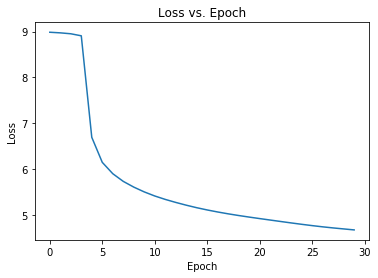

In [249]:
# Generate loss vs epoch plot from final trained model
generate_loss_epoch_plt(losses)

### Part a: We double then halve the original number of hidden units.

### We then display a loss vs epoch plot and the text sampling results.

In [250]:
np.random.seed(10)
# Train on a small subset of the data to see what happens for hidden dimension of 100 and 
# 30 epochs
model = RNNVanilla(vocabulary_size, hidden_dim=200)
losses = train_with_sgd(model, XTrain[:100], YTrain[:100], nepoch=30, evaluate_loss_after=1)

2019-10-30 02:47:39: Loss after num_examples_seen=0 epoch=0: 8.987841
2019-10-30 02:48:06: Loss after num_examples_seen=100 epoch=1: 8.974026
2019-10-30 02:48:33: Loss after num_examples_seen=200 epoch=2: 8.951954
2019-10-30 02:48:58: Loss after num_examples_seen=300 epoch=3: 6.856553
2019-10-30 02:49:22: Loss after num_examples_seen=400 epoch=4: 6.107072
2019-10-30 02:49:47: Loss after num_examples_seen=500 epoch=5: 5.856458
2019-10-30 02:50:09: Loss after num_examples_seen=600 epoch=6: 5.704365
2019-10-30 02:50:29: Loss after num_examples_seen=700 epoch=7: 5.600037
2019-10-30 02:50:48: Loss after num_examples_seen=800 epoch=8: 5.508858
2019-10-30 02:51:09: Loss after num_examples_seen=900 epoch=9: 5.407975
2019-10-30 02:51:31: Loss after num_examples_seen=1000 epoch=10: 5.316871
2019-10-30 02:51:52: Loss after num_examples_seen=1100 epoch=11: 5.255837
2019-10-30 02:52:12: Loss after num_examples_seen=1200 epoch=12: 5.201469
2019-10-30 02:52:32: Loss after num_examples_seen=1300 epoch

In [263]:
model_num = 0
generate_sentences_with_model(model, num_sentences, senten_min_length, model_num)

Sentence # 1 of length 8
discussions , was only possessed attentive , loud
Sentence # 2 of length 8
empty into at they of . by .
Sentence # 3 of length 13
the of a height overboard no were sensible the part the of miles
Sentence # 4 of length 15
horn was drama evident while . . it of a were rise 35 was .
Sentence # 5 of length 10
not the was containing were were what the passage .
Sentence # 6 of length 7
charles northeast roaring did no fact great
Sentence # 7 of length 10
but was devastating after been if little to in .
Sentence # 8 of length 7
it after a was or a spherical
Sentence # 9 of length 11
, have ” is the great had came to great dangers
Sentence # 10 of length 17
farther it was a did may was to their expel balloon resounded october a , of covering


In [251]:
# Print losses for final trained model
for loss in losses:
    print("Losses for final trained model: " + str(loss))

Losses for final trained model: (0, 8.987840778641202)
Losses for final trained model: (100, 8.974026270746105)
Losses for final trained model: (200, 8.951953773716216)
Losses for final trained model: (300, 6.8565526659118285)
Losses for final trained model: (400, 6.107071944137023)
Losses for final trained model: (500, 5.8564580958492085)
Losses for final trained model: (600, 5.704364653515928)
Losses for final trained model: (700, 5.600037495280701)
Losses for final trained model: (800, 5.508857840947021)
Losses for final trained model: (900, 5.4079754040539205)
Losses for final trained model: (1000, 5.316871200892547)
Losses for final trained model: (1100, 5.255836657206071)
Losses for final trained model: (1200, 5.201469173084967)
Losses for final trained model: (1300, 5.155291922543004)
Losses for final trained model: (1400, 5.105853978876643)
Losses for final trained model: (1500, 5.067898625670266)
Losses for final trained model: (1600, 5.034786613376984)
Losses for final traine

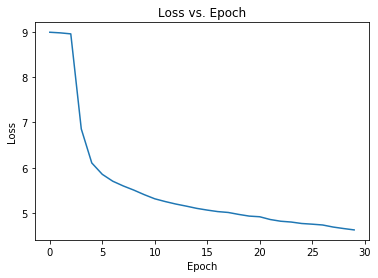

In [252]:
# Generate loss vs epoch plot from final trained model
generate_loss_epoch_plt(losses)

In [253]:
np.random.seed(10)
# Train on a small subset of the data to see what happens for hidden dimension of 100 and 
# 30 epochs
model = RNNVanilla(vocabulary_size, hidden_dim=50)
losses = train_with_sgd(model, XTrain[:100], YTrain[:100], nepoch=30, evaluate_loss_after=1)

2019-10-30 02:59:23: Loss after num_examples_seen=0 epoch=0: 8.987286
2019-10-30 02:59:30: Loss after num_examples_seen=100 epoch=1: 8.974989
2019-10-30 02:59:37: Loss after num_examples_seen=200 epoch=2: 8.956639
2019-10-30 02:59:44: Loss after num_examples_seen=300 epoch=3: 8.814319
2019-10-30 02:59:51: Loss after num_examples_seen=400 epoch=4: 6.805232
2019-10-30 02:59:58: Loss after num_examples_seen=500 epoch=5: 6.352553
2019-10-30 03:00:05: Loss after num_examples_seen=600 epoch=6: 6.105913
2019-10-30 03:00:12: Loss after num_examples_seen=700 epoch=7: 5.933703
2019-10-30 03:00:19: Loss after num_examples_seen=800 epoch=8: 5.796248
2019-10-30 03:00:26: Loss after num_examples_seen=900 epoch=9: 5.681134
2019-10-30 03:00:33: Loss after num_examples_seen=1000 epoch=10: 5.584433
2019-10-30 03:00:40: Loss after num_examples_seen=1100 epoch=11: 5.504887
2019-10-30 03:00:47: Loss after num_examples_seen=1200 epoch=12: 5.438862
2019-10-30 03:00:54: Loss after num_examples_seen=1300 epoch

In [264]:
model_num = 0
generate_sentences_with_model(model, num_sentences, senten_min_length, model_num)

Sentence # 1 of length 24
region of day that having height movement to to the was argument breeze , -- life be into movement examine sea day . .
Sentence # 2 of length 10
crushing which to without of lofty , than as balloon
Sentence # 3 of length 13
by murmuring had 24th have , in in sea was rate . .
Sentence # 4 of length 8
it of havana form no lofty as the
Sentence # 5 of length 11
bricks leveled everything air of feet a , sometimes sustained enterprise
Sentence # 6 of length 8
the to march thousand day the rejoined .
Sentence # 7 of length 7
kinds obliquely in discovered ’ of through
Sentence # 8 of length 7
the the year tempest none the the
Sentence # 9 of length 12
contrary the , to breeze sack . of lower above wind alone
Sentence # 10 of length 12
it is by itself 24th , mountains while for lofty ran the


In [254]:
# Print losses for final trained model
for loss in losses:
    print("Losses for final trained model: " + str(loss))

Losses for final trained model: (0, 8.987286366782675)
Losses for final trained model: (100, 8.97498906636971)
Losses for final trained model: (200, 8.956638780564761)
Losses for final trained model: (300, 8.814319374882414)
Losses for final trained model: (400, 6.805232137549876)
Losses for final trained model: (500, 6.352553270499179)
Losses for final trained model: (600, 6.105912796490565)
Losses for final trained model: (700, 5.933702958949123)
Losses for final trained model: (800, 5.796247651312062)
Losses for final trained model: (900, 5.681133525169246)
Losses for final trained model: (1000, 5.584433431593295)
Losses for final trained model: (1100, 5.504887428005688)
Losses for final trained model: (1200, 5.438862486098705)
Losses for final trained model: (1300, 5.3828619365930095)
Losses for final trained model: (1400, 5.334305643299944)
Losses for final trained model: (1500, 5.290909708243728)
Losses for final trained model: (1600, 5.250509978236971)
Losses for final trained m

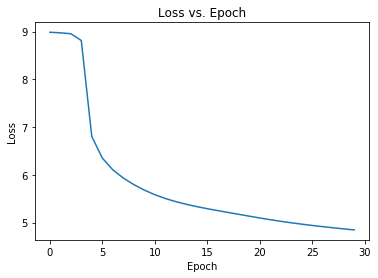

In [255]:
# Generate loss vs epoch plot from final trained model
generate_loss_epoch_plt(losses)

### Part b: We double then halve the original length of sentences.

### We then display a loss vs epoch plot and the text sampling results.

In [256]:
np.random.seed(10)
# Train on a small subset of the data to see what happens for hidden dimension of 100 and 
# 30 epochs
model = RNNVanilla(vocabulary_size, hidden_dim=100)
losses = train_with_sgd(model, XTrain_double[:100], YTrain_double[:100], nepoch=30, evaluate_loss_after=1)

2019-10-30 03:06:35: Loss after num_examples_seen=0 epoch=0: 8.987250
2019-10-30 03:07:01: Loss after num_examples_seen=100 epoch=1: 8.971931
2019-10-30 03:07:26: Loss after num_examples_seen=200 epoch=2: 6.870198
2019-10-30 03:07:55: Loss after num_examples_seen=300 epoch=3: 6.207778
2019-10-30 03:08:19: Loss after num_examples_seen=400 epoch=4: 6.011113
2019-10-30 03:08:44: Loss after num_examples_seen=500 epoch=5: 5.901763
2019-10-30 03:09:10: Loss after num_examples_seen=600 epoch=6: 5.811904
2019-10-30 03:09:33: Loss after num_examples_seen=700 epoch=7: 5.744759
2019-10-30 03:09:56: Loss after num_examples_seen=800 epoch=8: 5.697565
2019-10-30 03:10:22: Loss after num_examples_seen=900 epoch=9: 5.669299
2019-10-30 03:10:52: Loss after num_examples_seen=1000 epoch=10: 5.678890
Setting learning rate to 0.002500
2019-10-30 03:11:27: Loss after num_examples_seen=1100 epoch=11: 5.621277
2019-10-30 03:11:59: Loss after num_examples_seen=1200 epoch=12: 5.613412
2019-10-30 03:12:26: Loss 

In [266]:
model_num = 0
generate_sentences_with_model(model, num_sentences, senten_min_length, model_num)

Sentence # 1 of length 18
and have no regard by , sea be sustained , , such and in of that it zones
Sentence # 2 of length 8
nothing. immense the in to passed lighter .
Sentence # 3 of length 10
of their was is was , to energetic . .
Sentence # 4 of length 7
pierce at it to whole and in
Sentence # 5 of length 8
bolts sea it plaything , watercourse , .
Sentence # 6 of length 14
herds the havana to was eighteen terrible . , say horizontal if from part
Sentence # 7 of length 7
does extending last the atmosphere were .
Sentence # 8 of length 8
moderate was they balloon endeavored of resounded the
Sentence # 9 of length 13
only have removed lengthening to weight disasters from without less passengers . ,
Sentence # 10 of length 11
round passengers people which an of storm balloon hours the expedition


In [257]:
# Print losses for final trained model
for loss in losses:
    print("Losses for final trained model: " + str(loss))

Losses for final trained model: (0, 8.987249769421336)
Losses for final trained model: (100, 8.971931205774302)
Losses for final trained model: (200, 6.870198459875511)
Losses for final trained model: (300, 6.207778213944166)
Losses for final trained model: (400, 6.011112673534861)
Losses for final trained model: (500, 5.90176270803229)
Losses for final trained model: (600, 5.8119042256115625)
Losses for final trained model: (700, 5.744759387662695)
Losses for final trained model: (800, 5.69756500338993)
Losses for final trained model: (900, 5.669298814638054)
Losses for final trained model: (1000, 5.678890411709938)
Losses for final trained model: (1100, 5.6212768905364445)
Losses for final trained model: (1200, 5.613411905233475)
Losses for final trained model: (1300, 5.586977832825059)
Losses for final trained model: (1400, 5.561864776336102)
Losses for final trained model: (1500, 5.532550955168914)
Losses for final trained model: (1600, 5.530960001564596)
Losses for final trained m

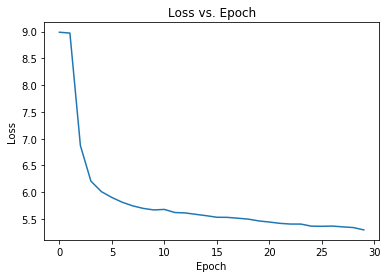

In [258]:
# Generate loss vs epoch plot from final trained model
generate_loss_epoch_plt(losses)

In [259]:
np.random.seed(10)
# Train on a small subset of the data to see what happens for hidden dimension of 100 and 
# 30 epochs
model = RNNVanilla(vocabulary_size, hidden_dim=100)
losses = train_with_sgd(model, XTrain_half[:100], YTrain_half[:100], nepoch=30, evaluate_loss_after=1)

2019-10-30 03:19:11: Loss after num_examples_seen=0 epoch=0: 8.987116
2019-10-30 03:19:18: Loss after num_examples_seen=100 epoch=1: 8.980293
2019-10-30 03:19:25: Loss after num_examples_seen=200 epoch=2: 8.972622
2019-10-30 03:19:33: Loss after num_examples_seen=300 epoch=3: 8.962758
2019-10-30 03:19:40: Loss after num_examples_seen=400 epoch=4: 8.946729
2019-10-30 03:19:47: Loss after num_examples_seen=500 epoch=5: 7.951856
2019-10-30 03:19:54: Loss after num_examples_seen=600 epoch=6: 6.664597
2019-10-30 03:20:00: Loss after num_examples_seen=700 epoch=7: 6.217599
2019-10-30 03:20:07: Loss after num_examples_seen=800 epoch=8: 5.957195
2019-10-30 03:20:14: Loss after num_examples_seen=900 epoch=9: 5.778880
2019-10-30 03:20:21: Loss after num_examples_seen=1000 epoch=10: 5.646273
2019-10-30 03:20:28: Loss after num_examples_seen=1100 epoch=11: 5.543695
2019-10-30 03:20:34: Loss after num_examples_seen=1200 epoch=12: 5.461293
2019-10-30 03:20:41: Loss after num_examples_seen=1300 epoch

In [267]:
model_num = 0
generate_sentences_with_model(model, num_sentences, senten_min_length, model_num)

Sentence # 1 of length 8
dropped ! could . movement descending their as
Sentence # 2 of length 7
in tempest , it have of that
Sentence # 3 of length 7
, , . of a horizontal to
Sentence # 4 of length 7
it feet to of only balloon could
Sentence # 5 of length 12
the ” of the their is noise from dashing was low zones
Sentence # 6 of length 11
accelerated were while traversed alone every rate a taken to a
Sentence # 7 of length 14
language we ” the , sensible vast while balloon year changed . in the
Sentence # 8 of length 7
planted diminished the solidity did and equator
Sentence # 9 of length 15
suspecting was discovered their hours may which less thousand taken hauling hours was day call
Sentence # 10 of length 14
were is the only miles lofty some could ; beneath the waves of the


In [260]:
# Print losses for final trained model
for loss in losses:
    print("Losses for final trained model: " + str(loss))

Losses for final trained model: (0, 8.987115686118328)
Losses for final trained model: (100, 8.980293262135893)
Losses for final trained model: (200, 8.972622141603473)
Losses for final trained model: (300, 8.962758142989374)
Losses for final trained model: (400, 8.946729329272799)
Losses for final trained model: (500, 7.951855843574217)
Losses for final trained model: (600, 6.664596967785795)
Losses for final trained model: (700, 6.2175994731360325)
Losses for final trained model: (800, 5.957195060951127)
Losses for final trained model: (900, 5.778879960268397)
Losses for final trained model: (1000, 5.646273492651651)
Losses for final trained model: (1100, 5.543694542874483)
Losses for final trained model: (1200, 5.461293285868861)
Losses for final trained model: (1300, 5.392850711713368)
Losses for final trained model: (1400, 5.334859252838354)
Losses for final trained model: (1500, 5.28519027953983)
Losses for final trained model: (1600, 5.242233242099906)
Losses for final trained m

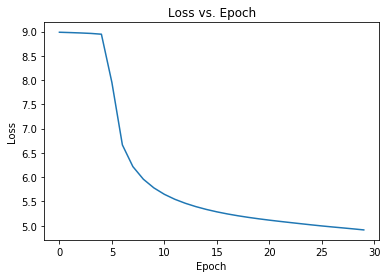

In [261]:
# Generate loss vs epoch plot from final trained model
generate_loss_epoch_plt(losses)